<a href="https://colab.research.google.com/github/SherryFu0315/Click-Fraud/blob/master/QTable_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
env = gym.make('FrozenLake-v0')

print "Number of States:" + str(env.observation_space.n)
print "Number of Actions:" + str(env.action_space.n)

Number of States:16
Number of Actions:4


In [4]:
print "Starting state:" + str(env.reset())
nextState,reward,endEpisode,_ = env.step(1)
print "Next State:" + str(nextState) + " Reward:" + str(reward) + " EndGame:" + str(endEpisode) 

Starting state:0
Next State:1 Reward:0.0 EndGame:False


In [9]:
# Initialize Q-Table 16x4 matrix
Q = np.zeros([env.observation_space.n,env.action_space.n])

# Set hyper parameters
alpha = .8             # Learning Rate
gamma = .95            # Discount Factor
num_episodes = 2000   

# Keep track of total reward across all episodes
rList = []
tList = []

for i in range(num_episodes):
    #At the start of every episode - Reset environment and all variables.
    state = env.reset()
    rAll = 0
    endEpisode = False
    iter = 0
    
    # Take at most 99 steps in every episode
    while iter < 99:
        iter+=1
        
        #Choose an action
        action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        
        
        #Take the action
        nextState,reward,endEpisode,_ = env.step(action)
        
        
        #Update Q-Table with new knowledge - PLEASE FILL CORRECT UPDATE!!
        Q[state,action] = Q[state,action] + alpha*(reward+gamma*np.max(Q[nextState,:]) - Q[state,action])
        
        
        rAll += np.power(gamma,iter)*reward
        state = nextState
        if endEpisode == True:
            break
    
    print "Episode: " + str(i) + ", Episode Length: " + str(iter) + ", Episode Reward: " + str(rAll)
    rList.append(rAll)
    tList.append(iter)

print("Score over time: " +  str(sum(rList)/num_episodes))

Episode: 0, Episode Length: 10, Episode Reward: 0.5987369392383787
Episode: 1, Episode Length: 8, Episode Reward: 0.0
Episode: 2, Episode Length: 9, Episode Reward: 0.0
Episode: 3, Episode Length: 8, Episode Reward: 0.0
Episode: 4, Episode Length: 14, Episode Reward: 0.0
Episode: 5, Episode Length: 6, Episode Reward: 0.0
Episode: 6, Episode Length: 14, Episode Reward: 0.0
Episode: 7, Episode Length: 8, Episode Reward: 0.0
Episode: 8, Episode Length: 8, Episode Reward: 0.0
Episode: 9, Episode Length: 26, Episode Reward: 0.0
Episode: 10, Episode Length: 3, Episode Reward: 0.0
Episode: 11, Episode Length: 5, Episode Reward: 0.0
Episode: 12, Episode Length: 21, Episode Reward: 0.0
Episode: 13, Episode Length: 5, Episode Reward: 0.0
Episode: 14, Episode Length: 4, Episode Reward: 0.0
Episode: 15, Episode Length: 4, Episode Reward: 0.0
Episode: 16, Episode Length: 2, Episode Reward: 0.0
Episode: 17, Episode Length: 8, Episode Reward: 0.0
Episode: 18, Episode Length: 14, Episode Reward: 0.0
E

Final Q-Table Values
[[2.17240038e-01 3.44779067e-03 4.68989355e-03 3.27319675e-03]
 [2.35197799e-04 1.00477548e-04 1.10098519e-04 1.38455752e-01]
 [8.93729782e-04 1.88274276e-01 1.20631877e-03 2.39613400e-03]
 [5.11131175e-04 6.56002135e-06 1.45044170e-04 7.39786452e-02]
 [3.44278197e-01 1.73802666e-03 3.23204520e-03 4.09427696e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.32623637e-05 3.77330010e-05 4.20002140e-02 4.91749493e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.91058953e-03 8.92077951e-04 8.97589152e-03 4.71269995e-01]
 [3.60276962e-03 7.69401553e-01 3.01519540e-03 1.90460380e-03]
 [2.84940768e-01 3.86179313e-04 7.05430877e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.60934250e-01 1.25231066e-03]
 [0.00000000e+00 7.91384023e-01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.

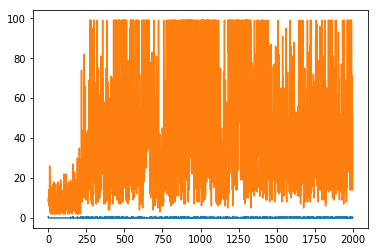

In [11]:
plt.plot(range(num_episodes),rList)
#plt.plot(range(num_episodes),tList)

print("Final Q-Table Values")
print(Q)